In [3]:
################################
# 전국 도시공원 데이터 분석사례
################################

In [4]:
#-----------------------------
# 1부. 데이터 불러오기
#-----------------------------

In [77]:
# 01_필요한 라이브러리 불러오기

import pandas as pd     # 데이터 프레임을 사용하기 위한 모듈
import numpy as np      # 벡터/행렬 처리 편리하게 하기 위한 모듈
from plotnine import *  # ggplot 문법을 사용할 수 있는 시각화 도구
import re               # Regular expression => 정규 표현식 사용
import folium           # 지도 표현을 위한 모듈

In [79]:
# 02_csv 데이터 로드

park = pd.read_csv('./data/도시공원.csv', encoding='UTF-8')
park.shape                 # 데이터 크기 확인 1.8만 건 / 19개의 변수컬럼

(17898, 19)

In [80]:
# 03_현재 컬럼명 보기 

park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [81]:
# 04_결측치 summary

park.isnull().sum()  # 공원보유시설 => 결측치 많음

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        12684
소재지지번주소           472
위도                378
경도                393
공원면적                0
공원보유시설(운동시설)    13313
공원보유시설(유희시설)    11829
공원보유시설(편익시설)    12936
공원보유시설(교양시설)    17054
공원보유시설(기타시설)    15439
지정고시일            2841
관리기관명             948
전화번호             1872
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

<AxesSubplot:>

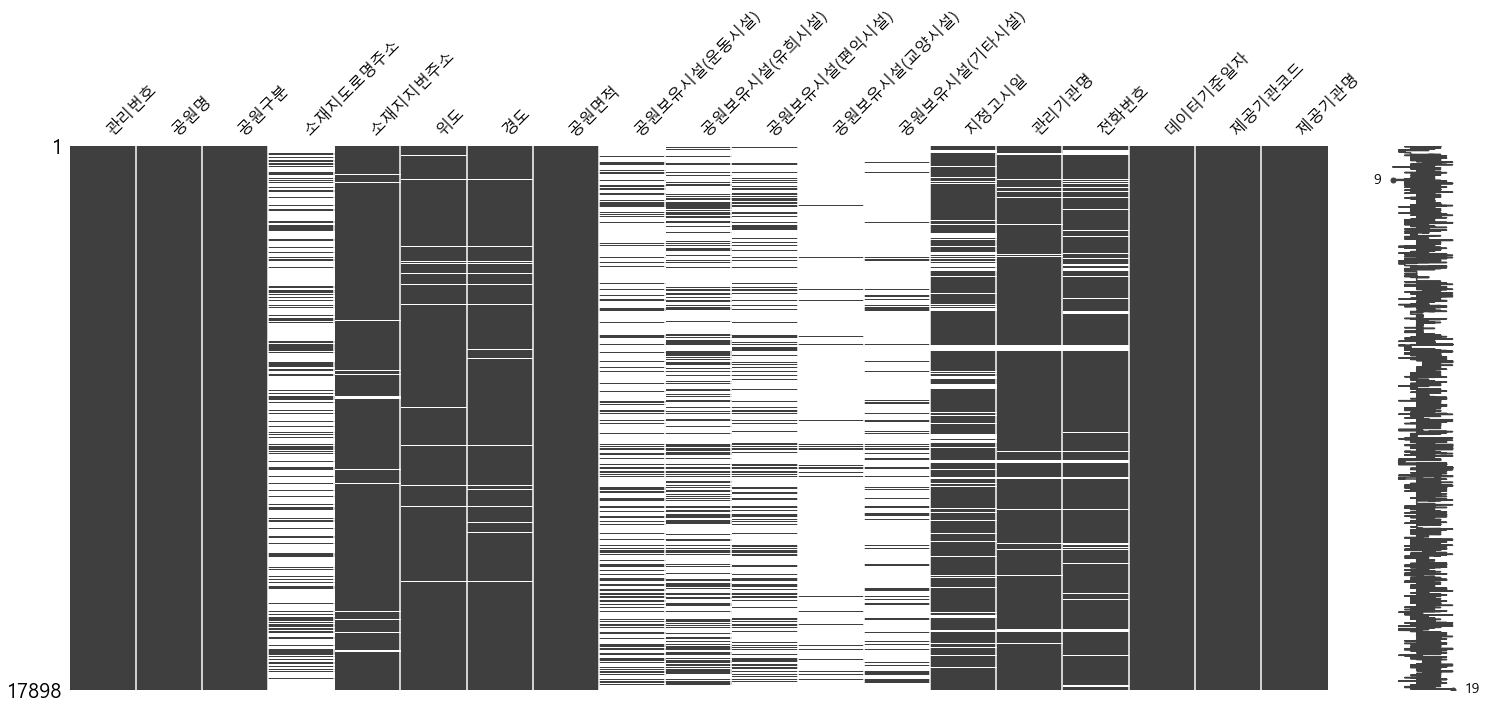

In [82]:
# 05_결측치 시각화 하기

import missingno as msno
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글폰트(윈도우) 설정
# plt.rcParams['font.family'] = 'AppleGothic'   # 한글폰트(맥) 설정

msno.matrix(park)

In [83]:
# 06_불필요한 컬럼명 지우기

park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명', ], inplace=True)

In [84]:
# 07_drop 컬럼 확인하기 

park.shape                 # 데이터 크기 확인 1.8만 건 / 12개의 변수컬럼

(17898, 12)

C:\Users\cmman\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:412: PlotnineWarning: geom_point : Removed 486 rows containing missing values.


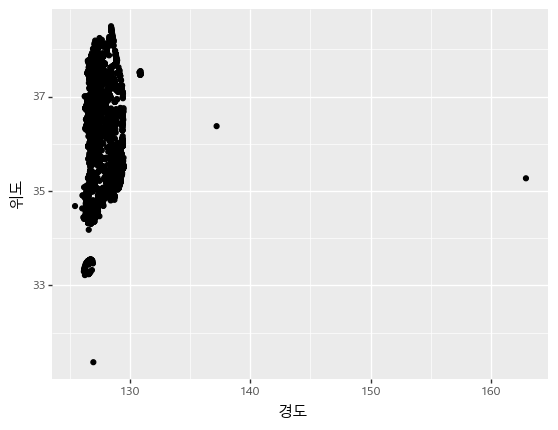

<ggplot: (141859051505)>

In [85]:
# 08_위경도 시각화

(ggplot(park)
 + aes(x='경도', y='위도')            # 위경도 아웃라이어 확인하기
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)                                                           

In [49]:
#-----------------------------
# 2부. 데이터 전처리
#-----------------------------

In [86]:
# 01_데이터 속성 확인하기

park.dtypes  # 공원면적 숫자로 변환할 필요 있음(float64 -> float)

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [87]:
# 02_공원면적 속성 변환하기

park['공원면적'] = park['공원면적'].astype(float)
park['공원면적'].head()

0     187515.0
1    1288164.0
2      36061.0
3     492000.0
4      28162.0
Name: 공원면적, dtype: float64

In [88]:
park.head(4)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,27140-00069,율하체육공원,체육공원,NaN,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,053-662-2860,2021-09-01,6270000,대구광역시
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,053-666-2850,2021-09-01,6270000,대구광역시
2,27290-00175,월배체육공원,체육공원,NaN,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,053-667-2850,2021-09-01,6270000,대구광역시
3,27710-00058,명곡체육공원,체육공원,대구광역시 달성군 화원읍 인흥1길 12,대구광역시 달성군 화원읍 명곡리 55,35.797690,128.503601,492000.0,053-668-2850,2021-09-01,6270000,대구광역시


In [89]:
# 04_도로명 주소의 널값 수

park['소재지도로명주소'].isnull().sum()   # 소재지 주소의 널값 수 => 11509
park['소재지지번주소'].isnull().sum()     # 지번 주소의 널값 수   =>   928

472

In [90]:
# 05_도로명 주소 vs. 지번주소 비교
# 소재지도로명주소 가 null 이고, 소재지지번주소 가 null 이 아닌 것은 몇 개인가?

park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(12684, 12)

In [91]:
# 06_소재지도로명주소로 소재지지번주소를 채워라 

park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)
park['소재지도로명주소'].isnull().sum()

0

In [92]:
# 07_채우기 다시 확인하기

park_loc = park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]
park_loc.shape
# 소재지도로명주소 가 null 이고, 소재지지번주소 가 null 이 아닌 것은 몇 개인가?

(0, 12)

In [93]:
# 08_시도 / 구군 데이터 추출 하기 

park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
# 소재지도로명주소 컬럼 내 string 데이터를 공백('  ')으로 split 하고, 0/1번 인덱스 값을 가져와서 '시도'/'구군' 컬럼에 저장하기 
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,27140-00069,율하체육공원,체육공원,대구광역시 동구 율하동 1626,대구광역시 동구 율하동 1626,35.859925,128.692838,187515.0,053-662-2860,2021-09-01,6270000,대구광역시,대구광역시,동구
1,27260-00037,대구체육공원,체육공원,대구광역시 수성구 유니버시아드로 180,대구광역시 수성구 대흥동 산35,35.829768,128.690164,1288164.0,053-666-2850,2021-09-01,6270000,대구광역시,대구광역시,수성구
2,27290-00175,월배체육공원,체육공원,대구광역시 달서구 도원동 1473,대구광역시 달서구 도원동 1473,35.801600,128.536496,36061.0,053-667-2850,2021-09-01,6270000,대구광역시,대구광역시,달서구


In [94]:
# 09_위경도 기술통계 보기

park[['위도', '경도']].describe()

,위도,경도
count,17520.000000,17505.000000
mean,36.428719,127.482311
std,1.060166,0.900673
min,31.373336,125.432215
25%,35.376037,126.867948
50%,36.637261,127.106021
75%,37.427678,128.012184
max,38.491555,162.920004


C:\Users\cmman\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:412: PlotnineWarning: geom_point : Removed 486 rows containing missing values.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.


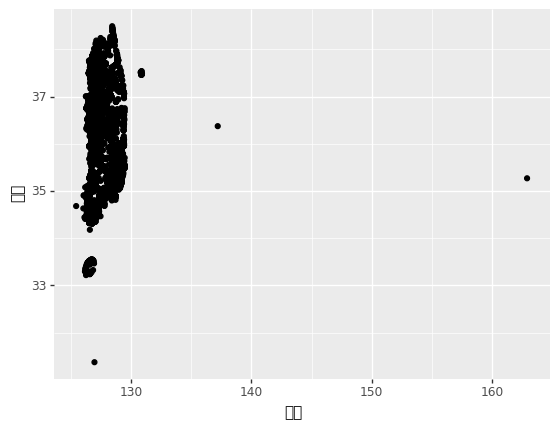

<ggplot: (141859049900)>

In [95]:
# 10_ggplot으로 그리기

(ggplot(park)
 + aes(x='경도', y='위도')            # 위도 => 132도 보다 낮은 경우만 선택
 + geom_point()                       # 경도 =>  32도 보다 높은 경우만 선택
 + theme(text=element_text(family='NanumBarunGothic'))
)    

In [96]:
# 11_아웃라이어 데이터를 제외하고 출력함

park_loc_notnull = park.loc[(park['위도'] > 32 ) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape

(17409, 14)

In [97]:
# 12_위경도가 잘못 입력된 데이터 확인하기

park_lost = park.loc[(park['위도'] < 26 ) | (park['경도'] >= 132)]
park_lost

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
2138,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-4433,2020-07-16,5710000,충청북도 청주시,충청북도,청주시
13614,46710-00112,공원-112,소공원,전라남도 담양군 대전면 성산리 434-13,전라남도 담양군 대전면 성산리 434-13,35.269633,162.920004,743.0,061-380-2574,2022-02-07,4850000,전라남도 담양군,전라남도,담양군


In [98]:
# 14_지역별 공원 카운팅 하기

park_loc_notnull['시도'].value_counts()
# 시도 단위로 group by 하고 => 카운팅 하기 

경기도          4112
충청남도         1654
서울특별시        1572
전라남도         1559
경상남도         1055
             ... 
한글비석로46가길       1
동일로204길         1
동일로239나길        1
공릉로34길          1
대전              1
Name: 시도, Length: 70, dtype: int64

In [99]:
#-----------------------------
# 3부. 데이터 시각화
#-----------------------------

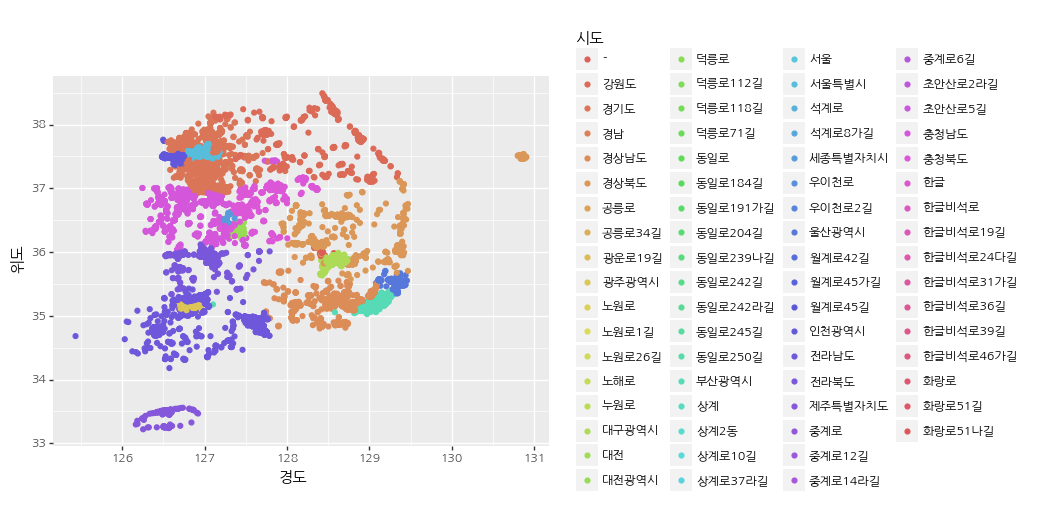

<ggplot: (141855647040)>

In [100]:
# 01_지역별로 공원 시각화 하기

(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumGothic'))
)

In [108]:
# 03_서울 특별시 공원만 보기

seoul = park[park['시도'] == '서울특별시']
seoul.shape

(1652, 14)

C:\Users\cmman\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:412: PlotnineWarning: geom_point : Removed 80 rows containing missing values.


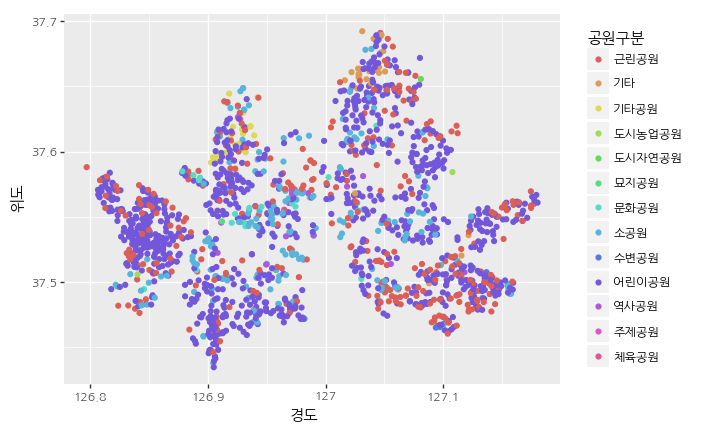

<ggplot: (141855139575)>

In [109]:
# 04_플로팅으로 아웃라이어 확인하기

(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + theme(text=element_text(family='NanumGothic'))
)